<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Covid_Classification2_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/sh/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa?dl=0


--2021-05-10 22:12:24--  https://www.dropbox.com/sh/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa [following]
--2021-05-10 22:12:24--  https://www.dropbox.com/sh/raw/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd8ff8256f7d42ddea5f77739dc.dl.dropboxusercontent.com/zip_download_get/AxolAdIGP5l_oh_2IIAKe7B_4MyvzvOphMbhijcQPnCknsmfSxkDmxyNygBwaMDb6Blma4_-cOaksyJx_TCoiW4-2dQ4xWmQlpVJVROkgYi7cQ [following]
--2021-05-10 22:12:30--  https://ucd8ff8256f7d42ddea5f77739dc.dl.dropboxusercontent.com/zip_download_get/AxolAdIGP5l_oh_2IIAKe7B_4MyvzvOphMbhijcQPnCknsmfSxkDmxyNygBwaMDb6Blma4_-cOaksyJx_

In [2]:
!unzip AAC68bnZvrCOQG9ETHx5UX2xa?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: Test/Normal/NORMAL_test_693.jpg  
 extracting: Test/Normal/NORMAL_test_652.jpg  
 extracting: Test/Normal/NORMAL_test_642.jpg  
 extracting: Train/Covid/COVID_train_344.jpg  
 extracting: Test/Normal/NORMAL_test_401.jpg  
 extracting: Train/Covid/COVID_train_332.jpg  
 extracting: Train/Covid/COVID_train_856.jpg  
 extracting: Train/Covid/COVID_train_962.jpg  
 extracting: Test/Normal/NORMAL_test_768.jpg  
 extracting: Train/Covid/COVID_train_302.jpg  
 extracting: Train/Covid/COVID_train_710.jpg  
 extracting: Train/Covid/COVID_train_877.jpg  
 extracting: Test/Normal/NORMAL_test_158.jpg  
 extracting: Train/Covid/COVID_train_840.jpg  
 extracting: Test/Normal/NORMAL_test_536.jpg  
 extracting: Train/Covid/COVID_train_494.jpg  
 extracting: Test/Normal/NORMAL_test_728.jpg  
 extracting: Test/Normal/NORMAL_test_132.jpg  
 extracting: Test/Normal/NORMAL_test_736.jpg  
 extracting: Train/Covid/COVID_train_964.jpg  
 extracti

In [25]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [26]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [27]:
train = image_generator.flow_from_directory('Train', 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(224, 224))

validation = image_generator.flow_from_directory('Val', 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(224, 224))

test = image_generator.flow_from_directory('Test', 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(224, 224))

Found 5581 images belonging to 2 classes.
Found 1862 images belonging to 2 classes.
Found 1860 images belonging to 2 classes.


In [28]:
num_covid=len(os.listdir(os.path.join('Train', 'Covid')))
num_normal=len(os.listdir(os.path.join('Train', 'Normal')))

In [29]:
weight_for_0 = num_covid / (num_normal + num_covid)
weight_for_1 = num_normal / (num_normal + num_covid)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.50
Weight for class 1: 0.50


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 64)       

In [32]:
r = model.fit(
    train, 
    epochs=15,
    validation_data=validation,
    validation_steps=155,
)

Epoch 1/15
698/698 [==============================] - 96s 137ms/step - loss: 0.6391 - accuracy: 0.6563 - val_loss: 0.5576 - val_accuracy: 0.7742
Epoch 2/15
698/698 [==============================] - 95s 136ms/step - loss: 0.3294 - accuracy: 0.8609 - val_loss: 0.3449 - val_accuracy: 0.8774
Epoch 3/15
698/698 [==============================] - 95s 136ms/step - loss: 0.2438 - accuracy: 0.9047 - val_loss: 0.3387 - val_accuracy: 0.8839
Epoch 4/15
698/698 [==============================] - 95s 136ms/step - loss: 0.2103 - accuracy: 0.9120 - val_loss: 0.2040 - val_accuracy: 0.9355
Epoch 5/15
698/698 [==============================] - 95s 135ms/step - loss: 0.1939 - accuracy: 0.9266 - val_loss: 0.2496 - val_accuracy: 0.9226
Epoch 6/15
698/698 [==============================] - 94s 135ms/step - loss: 0.1687 - accuracy: 0.9339 - val_loss: 0.1568 - val_accuracy: 0.9419
Epoch 7/15
698/698 [==============================] - 94s 135ms/step - loss: 0.1479 - accuracy: 0.9436 - val_loss: 0.1421 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

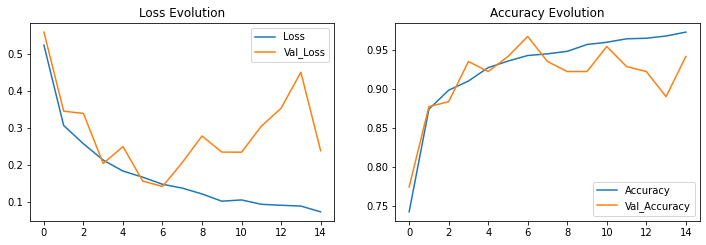

In [33]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [34]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

1860/1860 [==============================] - 26s 14ms/step - loss: 0.2314 - accuracy: 0.9333
Test Accuracy: 93.33%
698/698 [==============================] - 85s 122ms/step - loss: 0.0489 - accuracy: 0.9833
Train Accuracy: 98.33%


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[890  40]
 [ 92 838]]


,0,1,accuracy,macro avg,weighted avg
precision,0.906314,0.954442,0.929032,0.930378,0.930378
recall,0.956989,0.901075,0.929032,0.929032,0.929032
f1-score,0.930962,0.926991,0.929032,0.928977,0.928977
support,930.000000,930.000000,0.929032,1860.000000,1860.000000
